In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import read_csv
import matplotlib.pyplot as plt

In [19]:
recipes = read_csv("epi_r.csv")

# EDA

In [20]:
print(recipes.dtypes)
len(recipes)

title          object
rating        float64
calories      float64
protein       float64
fat           float64
               ...   
cookbooks     float64
leftovers     float64
snack         float64
snack week    float64
turkey        float64
Length: 680, dtype: object


20052

In [21]:
recipes.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
recipes[recipes.rating.isnull()]
recipes.columns
recipes["#wasteless"].unique()

array([0., 1.])

In [23]:
recipes = recipes[["title", "rating", "calories", "protein", "fat", "sodium", "#wasteless", "22-minute meals", "3-ingredient recipes"]]
recipes.head()

,title,rating,calories,protein,fat,sodium,#wasteless,22-minute meals,3-ingredient recipes
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0


In [29]:
recipes=recipes[~recipes.calories.isnull()]
recipes=recipes[~recipes.fat.isnull()]
recipes=recipes[~recipes.protein.isnull()]
recipes=recipes[~recipes.sodium.isnull()]
recipes

,title,rating,calories,protein,fat,sodium,#wasteless,22-minute meals,3-ingredient recipes
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0


In [30]:
recipes[recipes.title.isnull()]

,title,rating,calories,protein,fat,sodium,#wasteless,22-minute meals,3-ingredient recipes


In [31]:
X=recipes[["calories", "protein", "fat", "sodium", "#wasteless", "22-minute meals", "3-ingredient recipes"]]
y=recipes['rating']

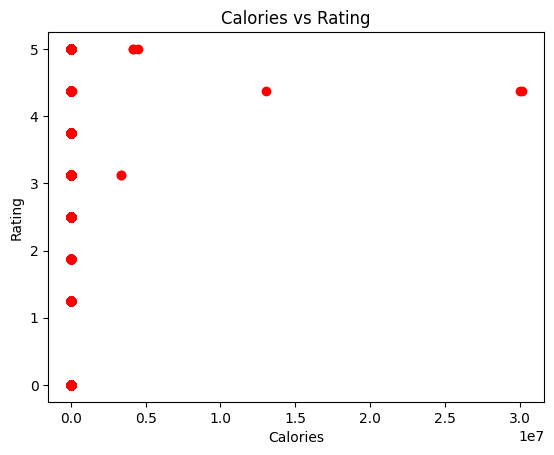

In [32]:
plt.scatter(recipes["calories"], y, color='red')
plt.title('Calories vs Rating')
plt.xlabel('Calories')
plt.ylabel('Rating')
plt.show()

In [34]:
recipes = recipes[recipes['calories'] < 10000].dropna()
recipes

,title,rating,calories,protein,fat,sodium,#wasteless,22-minute meals,3-ingredient recipes
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0


In [37]:
X=recipes[["calories", "protein", "fat", "sodium", "#wasteless", "22-minute meals", "3-ingredient recipes"]]
y=recipes['rating']

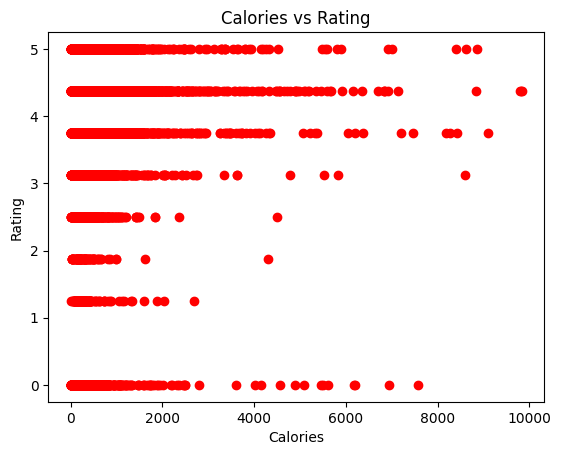

In [38]:
plt.scatter(recipes["calories"], y, color='red')
plt.title('Calories vs Rating')
plt.xlabel('Calories')
plt.ylabel('Rating')
plt.show()

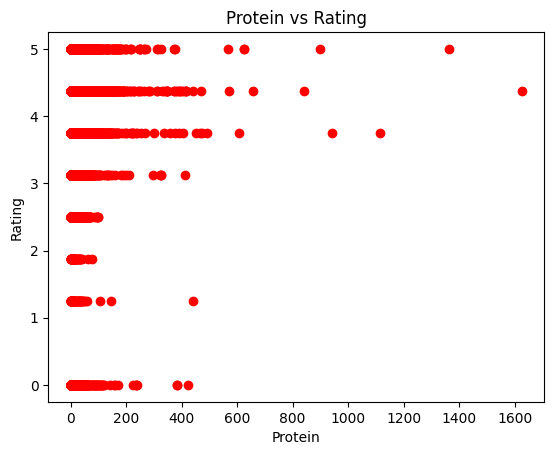

In [39]:
plt.scatter(recipes["protein"], y, color='red')
plt.title('Protein vs Rating')
plt.xlabel('Protein')
plt.ylabel('Rating')
plt.show() 

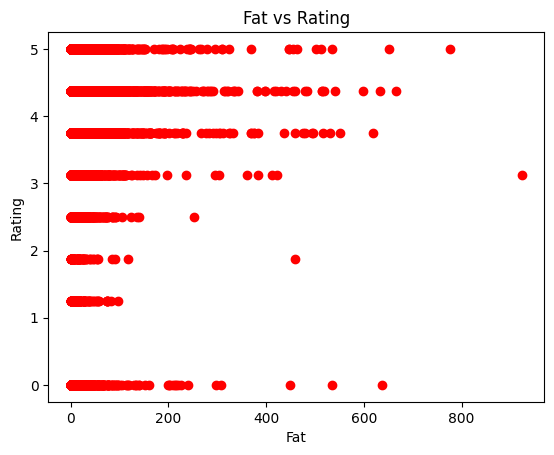

In [40]:
plt.scatter(recipes["fat"], y, color='red')
plt.title('Fat vs Rating')
plt.xlabel('Fat')
plt.ylabel('Rating')
plt.show()

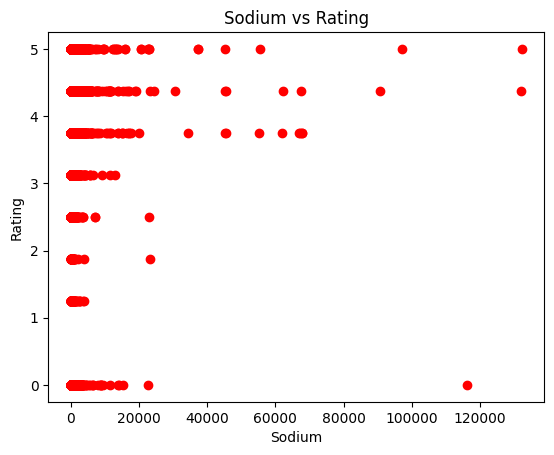

In [41]:
plt.scatter(recipes["sodium"], y, color='red')
plt.title('Sodium vs Rating')
plt.xlabel('Sodium')
plt.ylabel('Rating')
plt.show()

In [42]:
recipes['rating'].unique()

array([2.5  , 4.375, 3.75 , 3.125, 1.875, 5.   , 0.   , 1.25 ])

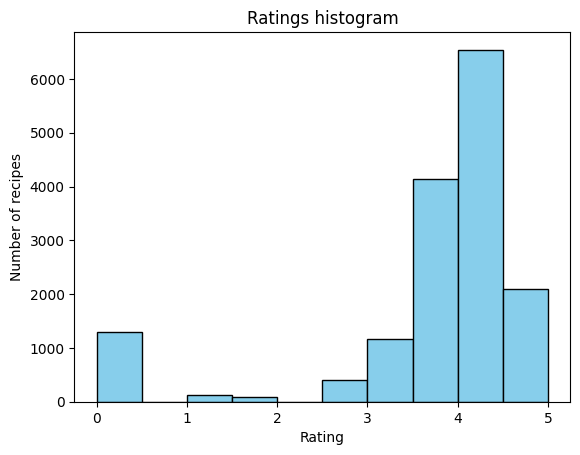

In [44]:
plt.hist(recipes['rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Ratings histogram')
plt.xlabel('Rating')
plt.ylabel('Number of recipes')
plt.show()

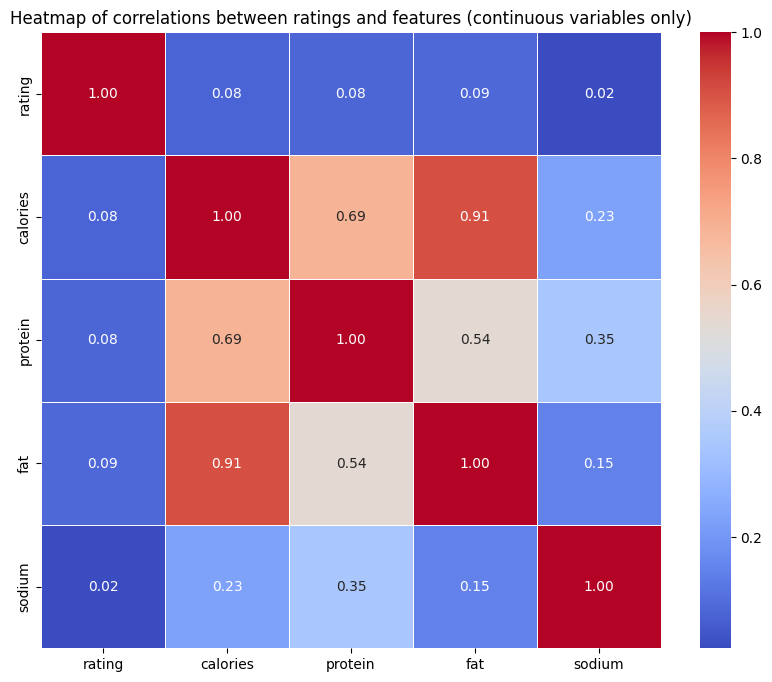

In [52]:
recipes_features = recipes[['rating', 'calories', 'protein', 'fat', 'sodium']]

correlation_matrix = recipes_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of correlations between ratings and features (continuous variables only)')
plt.show()

In [53]:
recipes_wasteless = recipes[recipes["#wasteless"] == 1]
recipes_wasteless

,title,rating,calories,protein,fat,sodium,#wasteless,22-minute meals,3-ingredient recipes
9769,Honey-Glazed Carrots with Carrot Top Gremolata,5.0,186.0,3.0,8.0,197.0,1.0,0.0,0.0


In [54]:
recipes[recipes["3-ingredient recipes"]==1.0].count()

title                   20
rating                  20
calories                20
protein                 20
fat                     20
sodium                  20
#wasteless              20
22-minute meals         20
3-ingredient recipes    20
dtype: int64

# Matrix X and y - final selection

In [55]:
X=recipes[["protein", "fat"]]
y=recipes["rating"]

# Training and test data

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
print(X.shape,y.shape)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(15843, 2) (15843,)
(12674, 2) (12674,)
(3169, 2) (3169,)


# Linear Regression model

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [61]:
model_L=LinearRegression()
model_L.fit(X_train,y_train)

y_predict_L=model_L.predict(X_test)

In [64]:
print(model_L.intercept_)
print(model_L.coef_)

print(r2_score(y_test,y_predict_L))

adj_r2=1-(1-r2_score(y_test,y_predict_L))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adj_r2)

3.6780787511449953
[0.001708   0.00174094]
0.008145554111289144
0.007518987815718248


# Decission Tree - preliminary model

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [66]:
model_T = DecisionTreeRegressor(min_samples_split=0.1, max_depth=5, random_state=42)
model_T.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=0.1, random_state=42)

[Text(0.32142857142857145, 0.9166666666666666, 'protein <= 0.5\nsquared_error = 1.65\nsamples = 12674\nvalue = 3.763'),
 Text(0.25, 0.75, 'squared_error = 4.233\nsamples = 670\nvalue = 2.695'),
 Text(0.39285714285714285, 0.75, 'fat <= 7.5\nsquared_error = 1.439\nsamples = 12004\nvalue = 3.822'),
 Text(0.14285714285714285, 0.5833333333333334, 'fat <= 1.5\nsquared_error = 2.358\nsamples = 2659\nvalue = 3.505'),
 Text(0.07142857142857142, 0.4166666666666667, 'squared_error = 3.17\nsamples = 1002\nvalue = 3.357'),
 Text(0.21428571428571427, 0.4166666666666667, 'protein <= 1.5\nsquared_error = 1.845\nsamples = 1657\nvalue = 3.594'),
 Text(0.14285714285714285, 0.25, 'squared_error = 2.273\nsamples = 274\nvalue = 3.463'),
 Text(0.2857142857142857, 0.25, 'fat <= 3.5\nsquared_error = 1.756\nsamples = 1383\nvalue = 3.62'),
 Text(0.21428571428571427, 0.08333333333333333, 'squared_error = 2.225\nsamples = 365\nvalue = 3.485'),
 Text(0.35714285714285715, 0.08333333333333333, 'squared_error = 1.579\

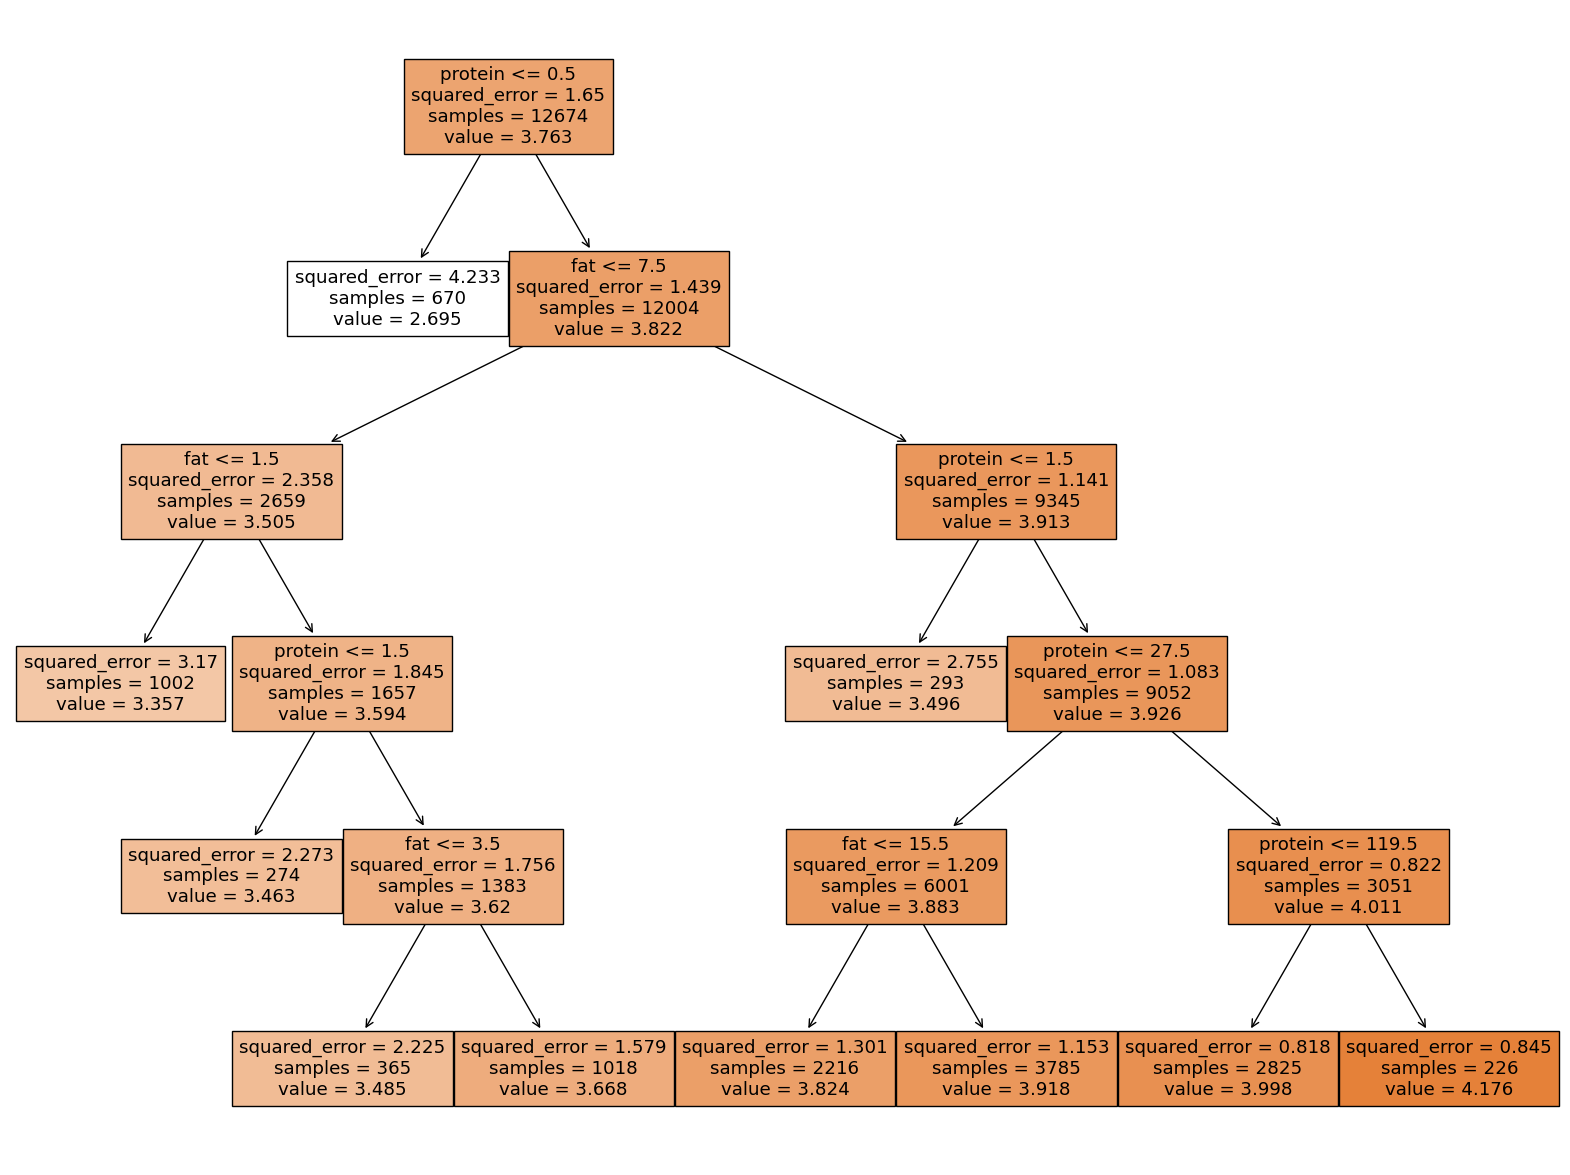

In [68]:
fig=plt.figure(figsize=(20,15))
tree.plot_tree(model_T,feature_names=X_train.columns,filled=True)

In [69]:
y_predict_tree=model_T.predict(X_test)

In [70]:
print(r2_score(y_test, y_predict_tree))

adj_r2=1-(1-r2_score(y_test,y_predict_tree))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adj_r2)

0.05333535185363558
0.05273733249283563


In [72]:
print(mean_absolute_error(y_test, y_predict_tree))
print(np.sqrt(mean_squared_error(y_test, y_predict_tree)))

0.8447195147160189
1.2550220737741322


# Optimization of tree parameters: max_depth and min_samples_split

In [73]:
from sklearn.model_selection import GridSearchCV

In [80]:
model_T=DecisionTreeRegressor()

gs=GridSearchCV(
    model_T,
    param_grid={'max_depth':range(1,11),
                'min_samples_split':range(500,1501,100)},
    cv=10,
    scoring='neg_mean_absolute_error'
)

In [81]:
gs.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_split': range(500, 1501, 100)},
             scoring='neg_mean_absolute_error')

In [82]:
print(gs.best_params_)
print(-gs.best_score_)

y_pred=gs.predict(X_test)
print(mean_absolute_error(y_test,y_pred))

{'max_depth': 5, 'min_samples_split': 600}
0.8441219906459375
0.8419503346229519


# Optimization of tree parameters: max_depth, min_samples_split and min_samples_leaf

In [87]:
gs=GridSearchCV(
    model_T,
    param_grid={'max_depth':range(1,11),
                'min_samples_split':range(500,1501,100),
                'min_samples_leaf':range(1,1000,100)},
    cv=10,
    scoring='neg_mean_absolute_error'
)

In [88]:
gs.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 1000, 100),
                         'min_samples_split': range(500, 1501, 100)},
             scoring='neg_mean_absolute_error')

In [89]:
print(gs.best_params_)
print(-gs.best_score_)

y_pred=gs.predict(X_test)
print(mean_absolute_error(y_test,y_pred))

{'max_depth': 7, 'min_samples_leaf': 101, 'min_samples_split': 600}
0.843776802935705
0.8428428309708752


# Decission Tree Regressor after optimization

In [90]:
model_T_optimized = DecisionTreeRegressor(min_samples_leaf=101, min_samples_split=600, max_depth=7, random_state=42)
model_T_optimized.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=101, min_samples_split=600,
                      random_state=42)

[Text(0.25669642857142855, 0.9375, 'protein <= 0.5\nsquared_error = 1.65\nsamples = 12674\nvalue = 3.763'),
 Text(0.07142857142857142, 0.8125, 'fat <= 0.5\nsquared_error = 4.233\nsamples = 670\nvalue = 2.695'),
 Text(0.03571428571428571, 0.6875, 'squared_error = 4.625\nsamples = 448\nvalue = 2.427'),
 Text(0.10714285714285714, 0.6875, 'squared_error = 3.006\nsamples = 222\nvalue = 3.235'),
 Text(0.4419642857142857, 0.8125, 'fat <= 7.5\nsquared_error = 1.439\nsamples = 12004\nvalue = 3.822'),
 Text(0.17857142857142858, 0.6875, 'fat <= 1.5\nsquared_error = 2.358\nsamples = 2659\nvalue = 3.505'),
 Text(0.10714285714285714, 0.5625, 'protein <= 2.5\nsquared_error = 3.17\nsamples = 1002\nvalue = 3.357'),
 Text(0.07142857142857142, 0.4375, 'protein <= 1.5\nsquared_error = 3.017\nsamples = 762\nvalue = 3.46'),
 Text(0.03571428571428571, 0.3125, 'squared_error = 2.989\nsamples = 494\nvalue = 3.489'),
 Text(0.10714285714285714, 0.3125, 'squared_error = 3.064\nsamples = 268\nvalue = 3.405'),
 Tex

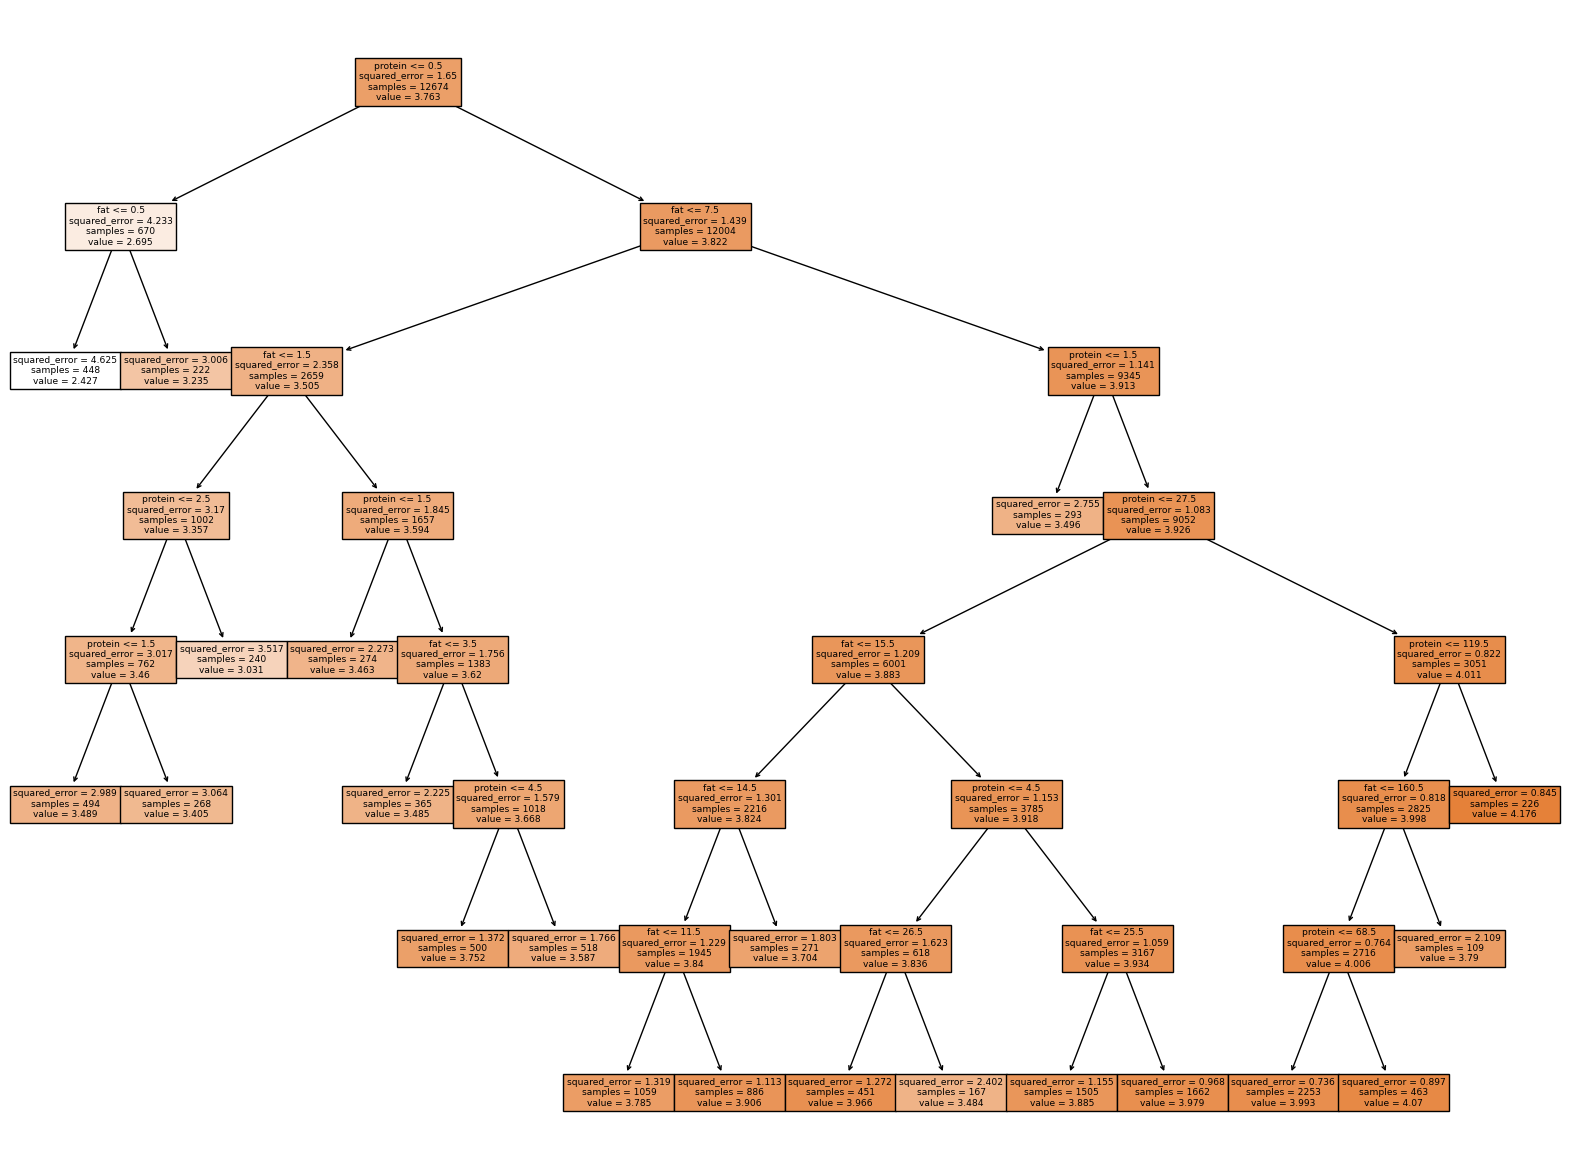

In [91]:
fig=plt.figure(figsize=(20,15))
tree.plot_tree(model_T_optimized,feature_names=X_train.columns,filled=True)

# Model Evaluation and Metrics

In [95]:
from sklearn.metrics import mean_absolute_percentage_error, root_mean_squared_error

In [106]:
yL_test_predict=model_L.predict(X_test)
print('r2 LR: ',r2_score(y_test,yL_test_predict))
yT_test_predict=model_T_optimized.predict(X_test)
print('r2 DT: ',r2_score(y_test,yT_test_predict),'\n')

adj_r2_L=1-(1-r2_score(y_test,yL_test_predict))*(len(y)-1)/(len(y)-X_test.shape[1]-1)
adj_r2_D=1-(1-r2_score(y_test,yT_test_predict))*(len(y)-1)/(len(y)-X_test.shape[1]-1)
print('adj_r2 LR: ', adj_r2_L)
print('adj_r2 DT: ', adj_r2_D,'\n')

print('MAE LR: ',mean_absolute_error(y_test,yL_test_predict))
print('MAE DT: ',mean_absolute_error(y_test,yT_test_predict),'\n')

print('MAPE LR: ',mean_absolute_percentage_error(y_test,yL_test_predict))
print('MAPE DT: ',mean_absolute_percentage_error(y_test,yT_test_predict),'\n')

print('RMSE LR: ',root_mean_squared_error(y_test,yL_test_predict))
print('RMSE DT: ',root_mean_squared_error(y_test,yT_test_predict),'\n')

r2 LR:  0.008145554111289144
r2 DT:  0.05378517598248023 

adj_r2 LR:  0.008020319964081035
adj_r2 DT:  0.05366570441379115 

MAE LR:  0.8430110268338736
MAE DT:  0.8428428309708752 

MAPE LR:  1382497649333059.0
MAPE DT:  1292720217552201.0 

RMSE LR:  1.284627624877347
RMSE DT:  1.2547238655909547 

